<a href="https://colab.research.google.com/github/HuaiyuZhang/DeepLearning/blob/main/OpenMMLab-Camp/Assignment_1_MMDetection_MMPose/%5BMMDetection%2BMMPose%5DEar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detect ears and estimate key points
First use MMDetection to locate the triangle, then use MMPose to detect the key points.

# 0. Environment setup

## 0.1 MMPose installation

In [ ]:
!pwd

/content/mmpose


In [ ]:
!pip3 install install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv==2.0.0rc3'
!mim install "mmdet>=3.0.0rc6"
!pip install opencv-python pillow matplotlib seaborn tqdm pycocotools -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
# Clone the mmpose repo
!git clone https://github.com/open-mmlab/mmpose.git -b tutorial2023

In [9]:
import os
os.chdir('/content/mmpose')

In [ ]:
# install MMPose
!mim install -e .

## 0.2 MMDetection installation

In [17]:
os.chdir('/content')

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git -b 3.x

In [19]:
os.chdir('mmdetection')

In [ ]:
!pip install -v -e .

## 0.3 Verify installation

In [1]:
import torch, torchvision
print('Pytorch version', torch.__version__)
print('CUDA availability',torch.cuda.is_available())
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV version', mmcv.__version__)
print('CUDA version', get_compiling_cuda_version())
print('compiler version', get_compiler_version())
import mmpose
print('mmpose version', mmpose.__version__)
# Check mmdetection
import mmdet
print('mmdetection version', mmdet.__version__)

Pytorch version 1.12.1+cu113
CUDA availability True
MMCV version 2.0.0
CUDA version 11.3
compiler version GCC 9.3
mmpose version 1.0.0
mmdetection version 3.0.0


In [2]:
# Had RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .
# Update numpy and restart session to resolve the problem
# !pip3 install numpy --upgrade

## 1. Ear detection using MMDetection

## 1.1 download data

In [24]:
import os

# Create checkpoint directory to save pre-trained weights
os.mkdir('/content/mmpose/checkpoint')

# Create outputs to save prediction results
os.mkdir('/content/mmpose/outputs')

# Create data directory to save images and videos
os.mkdir('/content/mmpose/data')

os.mkdir('/content/mmpose/data/test')

# Create checkpoint directory to save pre-trained weights
os.mkdir('/content/mmdetection/checkpoint')

# Create outputs to save prediction results
os.mkdir('/content/mmdetection/outputs')

# Create data directory to save images and videos
os.mkdir('/content/mmdetection/data')
os.mkdir('/content/mmdetection/data/test')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [5]:
import os
# os.chdir('/content/mmpose')
os.chdir('/content/mmdetection') # run data downloading in both directories 

In [4]:
# my file was downloaded to google drive. Copy to my data directory
!cp /content/drive/MyDrive/temp/Ear210_Dataset_coco.zip /content/mmdetection/data/Ear210_Dataset_coco.zip

In [6]:
!unzip data/Ear210_Dataset_coco.zip -d data >> /dev/null # Unzip
!rm -rf data/Ear210_Dataset_coco.zip # delete raw zip file

In [ ]:
# Benben Ear. This image is to test single image prediction
!cp /content/drive/MyDrive/temp/benben-ear.jpg /content/mmdetection/data/test/benben-ear.jpeg

In [7]:
!find . -iname '__MACOSX'
!find . -iname '.DS_Store'
!find . -iname '.ipynb_checkpoints'

!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done
!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

!find . -iname '__MACOSX'
!find . -iname '.DS_Store'
!find . -iname '.ipynb_checkpoints'


## 1.2 Download Config file

In [8]:
!cp /content/drive/MyDrive/temp/rtmdet_tiny_ear.py /content/mmdetection/data/rtmdet_tiny_ear.py

## 1.3 Trigger MMDetection training

In [9]:
os.chdir('/content/mmdetection')
!python tools/train.py data/rtmdet_tiny_ear.py

06/04 15:08:36 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 330756708
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.12.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code

## 1.4 Image prediction

In [10]:
import os
os.chdir('/content/mmdetection')
# Single image RTMDet
!python demo/image_demo.py \
        /content/mmdetection/data/test/benben-ear.jpeg \
        /content/mmdetection/data/rtmdet_tiny_ear.py \
        --weights /content/mmdetection/work_dirs/rtmdet_tiny_ear/epoch_50.pth \
        --out-dir outputs/benben_ear_rtmdet \
        --device cuda:0 \
        --pred-score-thr 0.3

Loads checkpoint by local backend from path: /content/mmdetection/work_dirs/rtmdet_tiny_ear/epoch_50.pth
06/04 16:15:10 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/04 16:15:10 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/usr/local/lib/python3.10/dist-packages/torch/functional.py:478: UserWarning: 
torch.meshgrid: in an upcoming release, it will be required to pass the indexing
argument. (Triggered internally at  
../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
results have been saved at outputs/benben_ear_rtmdet


## 1.5 Eval Set

In [11]:
# Eval on testing set
!python tools/test.py /content/mmdetection/data/rtmdet_tiny_ear.py /content/mmdetection/work_dirs/rtmdet_tiny_ear/epoch_50.pth

06/04 16:15:21 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 976752539
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.12.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code

## 1.6 Result Visualization

In [12]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  

log_path = '/content/mmdetection/work_dirs/rtmdet_tiny_ear/20230604_150836/vis_data/scalars.json'
with open(log_path, "r") as f:
    json_list = f.readlines()
print(len(json_list))
eval(json_list[4])

1074


{'lr': 1.6055855855855853e-05,
 'data_time': 5.024443435668945,
 'loss': 0.07981606274843216,
 'loss_cls': 0.07022667229175568,
 'loss_bbox': 0.00958939054980874,
 'time': 8.017853832244873,
 'epoch': 1,
 'iter': 5,
 'memory': 2584,
 'step': 5}

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [14]:
df_train

,lr,data_time,loss,loss_cls,loss_bbox,time,epoch,iter,memory,step
0,4.000000e-08,12.642430,0.074943,0.070627,0.004316,24.577138,1.0,1.0,2526.0,1.0
1,4.043964e-06,6.325833,0.077165,0.070614,0.006551,12.576798,1.0,2.0,2584.0,2.0
2,8.047928e-06,4.221341,0.077725,0.070521,0.007203,8.609060,1.0,3.0,2584.0,3.0
3,1.205189e-05,3.169772,0.076848,0.070374,0.006474,6.657700,1.0,4.0,2584.0,4.0
4,1.605586e-05,5.024443,0.079816,0.070227,0.009589,8.017854,1.0,5.0,2584.0,5.0
...,...,...,...,...,...,...,...,...,...,...
1045,4.000000e-03,1.370232,0.567710,0.224607,0.343103,1.948664,50.0,1046.0,2584.0,1046.0
1046,4.000000e-03,1.376287,0.567290,0.224546,0.342744,1.945610,50.0,1047.0,2584.0,1047.0
1047,4.000000e-03,1.376168,0.566332,0.224065,0.342267,1.937915,50.0,1048.0,2584.0,1048.0
1048,4.000000e-03,1.376085,0.566130,0.224312,0.341818,1.929576,50.0,1049.0,2584.0,1049.0


In [15]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,data_time,time,step
0,0.097,0.350,0.027,-1.0,-1.0,0.097,0.952113,1.068984,10.0
1,0.321,0.952,0.105,-1.0,-1.0,0.321,0.862318,0.946355,20.0
2,0.577,0.950,0.776,-1.0,-1.0,0.577,0.918007,1.011795,29.0
3,0.316,0.935,0.198,-1.0,-1.0,0.316,0.931067,1.028120,30.0
4,0.570,0.953,0.645,-1.0,-1.0,0.570,0.602779,0.678661,31.0
5,0.374,0.888,0.339,-1.0,-1.0,0.374,0.879468,0.976158,32.0
6,0.155,0.394,0.083,-1.0,-1.0,0.155,0.595188,0.673075,33.0
7,0.504,0.932,0.497,-1.0,-1.0,0.504,0.774829,0.871151,34.0
8,0.357,0.843,0.172,-1.0,-1.0,0.357,0.855402,0.937096,35.0
9,0.539,0.861,0.623,-1.0,-1.0,0.539,0.608317,0.685057,36.0


In [16]:
df_train.to_csv('/content/mmdetection/work_dirs/rtmdet_tiny_ear/log_train.csv', index=False)
df_test.to_csv('/content/mmdetection/work_dirs/rtmdet_tiny_ear/log_test.csv', index=False)

In [19]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    Randomly pick a line type
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [20]:
df_train.columns


Index(['lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox', 'time', 'epoch',
       'iter', 'memory', 'step'],
      dtype='object')

In [21]:
metrics = ['loss', 'loss_bbox', 'loss_cls']


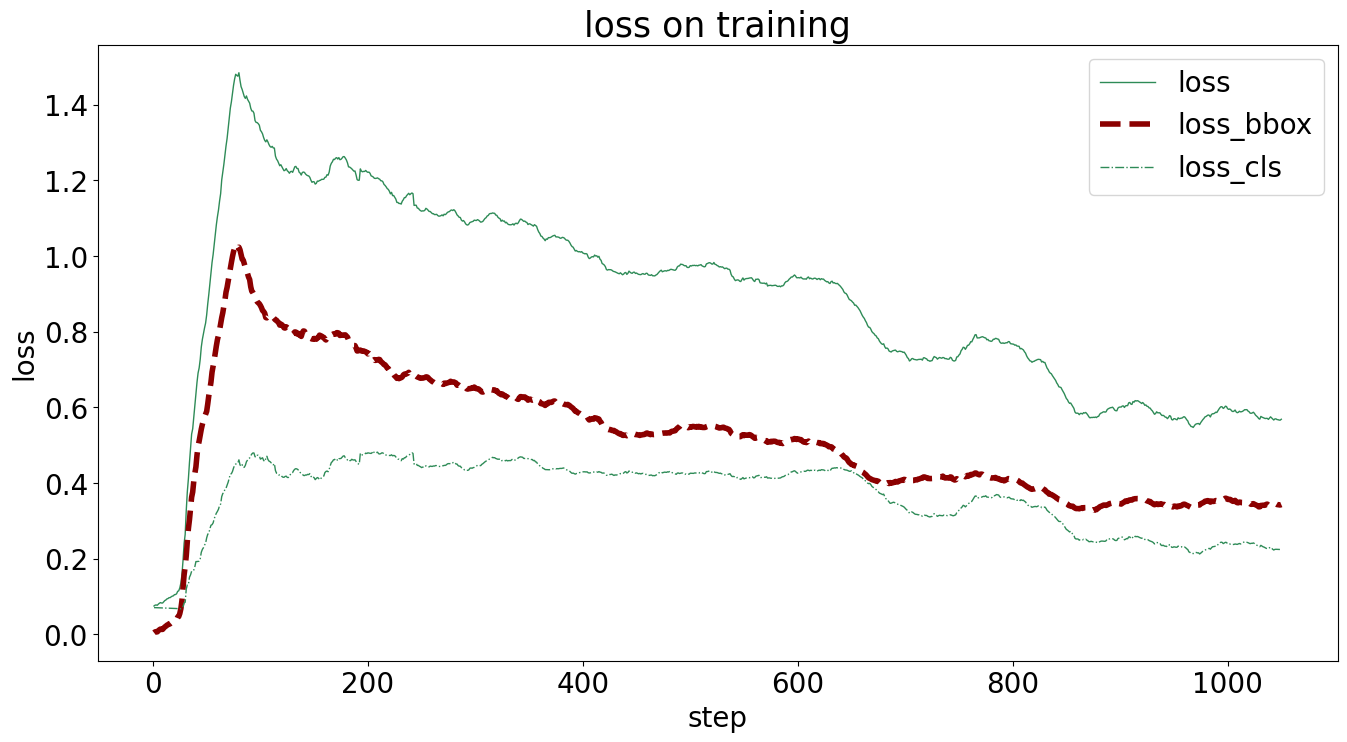

In [22]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('loss on training', fontsize=25)
# plt.savefig('log_train.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [23]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time',
       'time', 'step'],
      dtype='object')

In [24]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']


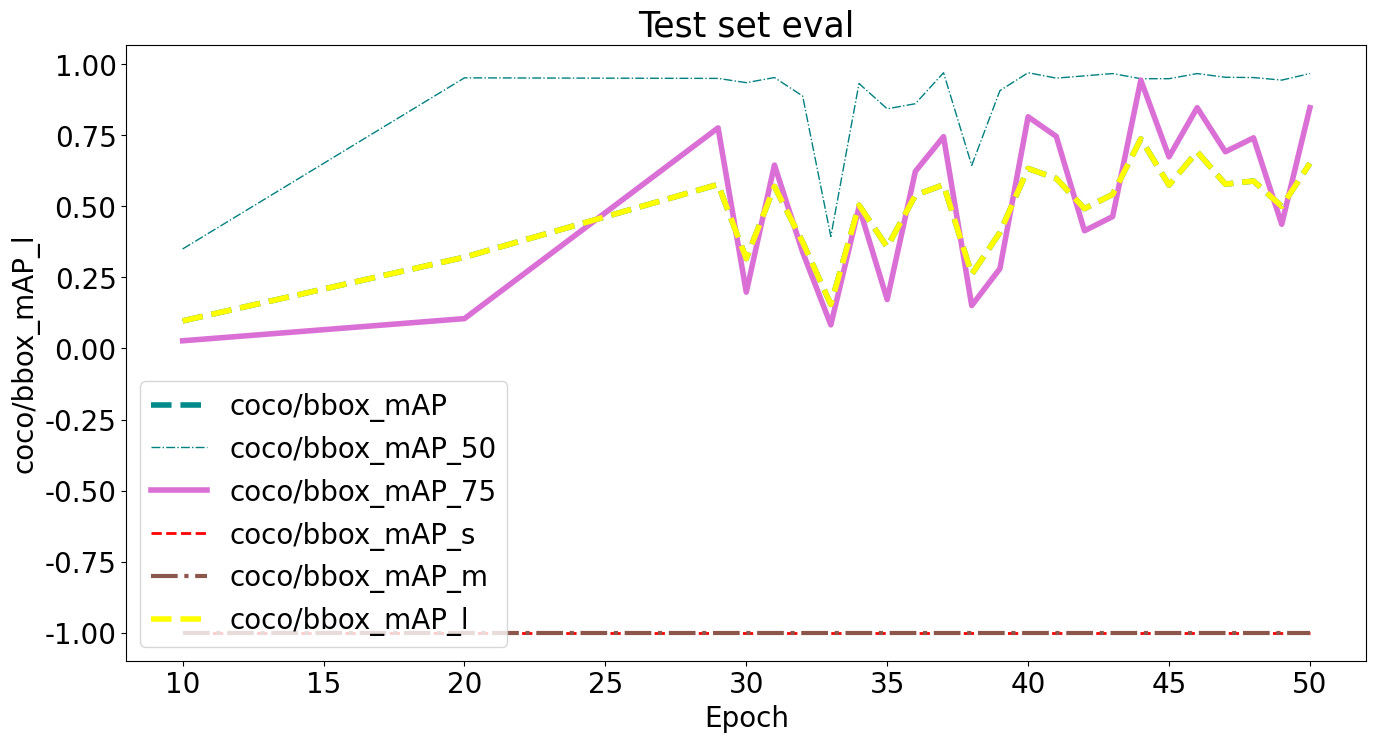

In [25]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('Test set eval', fontsize=25)
# plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [26]:
# save results
!cp -r /content/mmdetection/work_dirs/rtmdet_tiny_ear /content/drive/MyDrive/temp

# 2. RTMPose for ear key points estimation

In [27]:
import os
os.chdir('/content/mmpose')

In [28]:
# my file was downloaded to google drive. Copy to my data directory
!cp /content/drive/MyDrive/temp/Ear210_Dataset_coco.zip /content/mmpose/data/Ear210_Dataset_coco.zip

In [29]:
!unzip data/Ear210_Dataset_coco.zip -d data >> /dev/null # Unzip
!rm -rf data/Ear210_Dataset_coco.zip # delete raw zip file

In [32]:
# Benben Ear. This image is to test single image prediction
!cp /content/drive/MyDrive/temp/benben-ear.jpg /content/mmpose/data/test/benben-ear.jpeg

In [33]:
!find . -iname '__MACOSX'
!find . -iname '.DS_Store'
!find . -iname '.ipynb_checkpoints'

!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done
!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

!find . -iname '__MACOSX'
!find . -iname '.DS_Store'
!find . -iname '.ipynb_checkpoints'


In [34]:
!cp /content/drive/MyDrive/temp/rtmpose-s-ear.py /content/mmpose/data/rtmpose-s-ear.py

In [36]:
!python tools/train.py data/rtmpose-s-ear.py

06/04 16:52:20 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 21
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.12.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;

# 2.2 Single image prediction for RTMPose

In [37]:
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        /content/mmdetection/data/rtmdet_tiny_ear.py \
        /content/mmdetection/work_dirs/rtmdet_tiny_ear/epoch_50.pth \
        /content/mmpose/data/rtmpose-s-ear.py \
        /content/mmpose/work_dirs/rtmpose-s-ear/epoch_50.pth \
        --input /content/mmpose/data/test/benben-ear.jpeg \
        --output-root /content/mmpose/outputs/benben_ear_RTMDet-RTMPose \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 36 \
        --thickness 30 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

Loads checkpoint by local backend from path: /content/mmdetection/work_dirs/rtmdet_tiny_ear/epoch_50.pth
Loads checkpoint by local backend from path: /content/mmpose/work_dirs/rtmpose-s-ear/epoch_50.pth
06/04 17:57:22 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/usr/local/lib/python3.10/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '


## 2.3 Eval and performance report

In [38]:
# eval set
!python tools/test.py data/rtmpose-s-ear.py work_dirs/rtmpose-s-ear/epoch_50.pth

06/04 17:58:37 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 21
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.12.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;

In [39]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  

log_path = '/content/mmpose/work_dirs/rtmpose-s-ear/20230604_165219/vis_data/scalars.json'
with open(log_path, "r") as f:
    json_list = f.readlines()
print(len(json_list))

305


In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [51]:
df_train.to_csv('/content/mmpose/work_dirs/rtmpose-s-ear/log_train.csv', index=False)
df_test.to_csv('/content/mmpose/work_dirs/rtmpose-s-ear/log_test.csv', index=False)

In [52]:
df_train.head()

,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,iter,memory,step
0,4.000000e-08,40.770819,0.421651,0.421651,0.011905,46.475471,1.0,1.0,1532.0,1.0
1,2.105642e-04,20.510849,0.422039,0.422039,0.004464,23.497023,1.0,2.0,1599.0,2.0
2,4.210884e-04,13.679036,0.422581,0.422581,0.010417,15.735241,1.0,3.0,1599.0,3.0
3,6.316126e-04,10.261179,0.421454,0.421454,0.038690,11.850217,1.0,4.0,1599.0,4.0
4,8.421368e-04,10.080891,0.418832,0.418832,0.078869,11.397879,1.0,5.0,1599.0,5.0


In [53]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'iter', 'memory', 'step'],
      dtype='object')

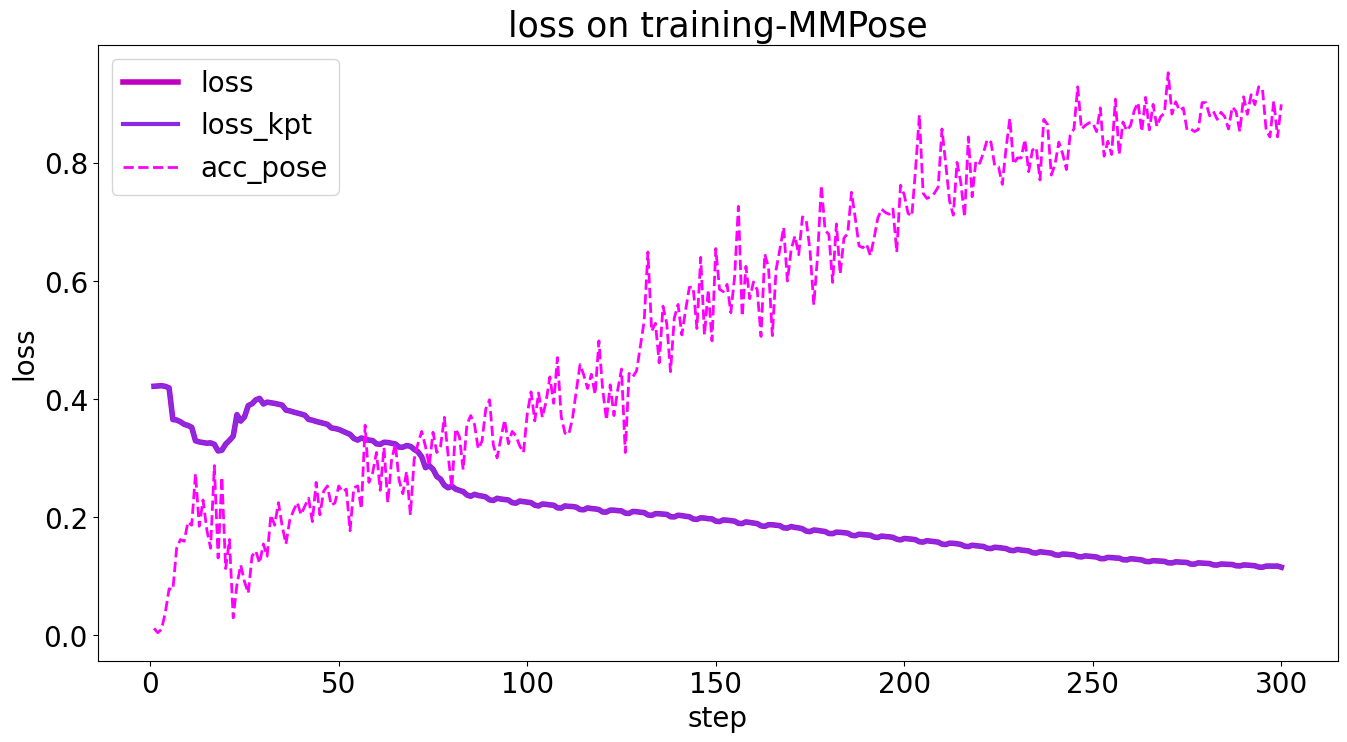

In [55]:
metrics = ['loss', 'loss_kpt', 'acc_pose']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('loss on training-MMPose', fontsize=25)
# plt.savefig('log_train.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [56]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

In [57]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)', 'PCK', 'AUC']


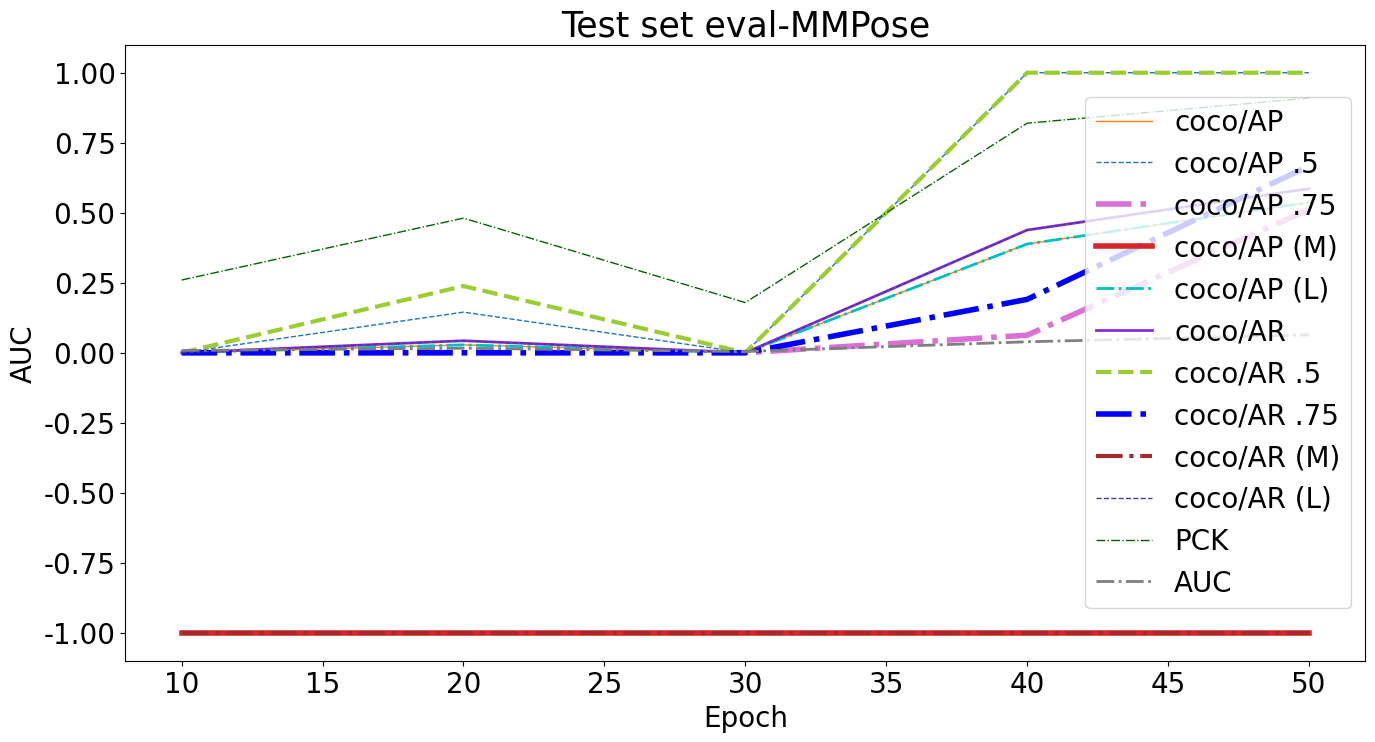

In [58]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('Test set eval-MMPose', fontsize=25)

plt.legend(fontsize=20)

plt.show()

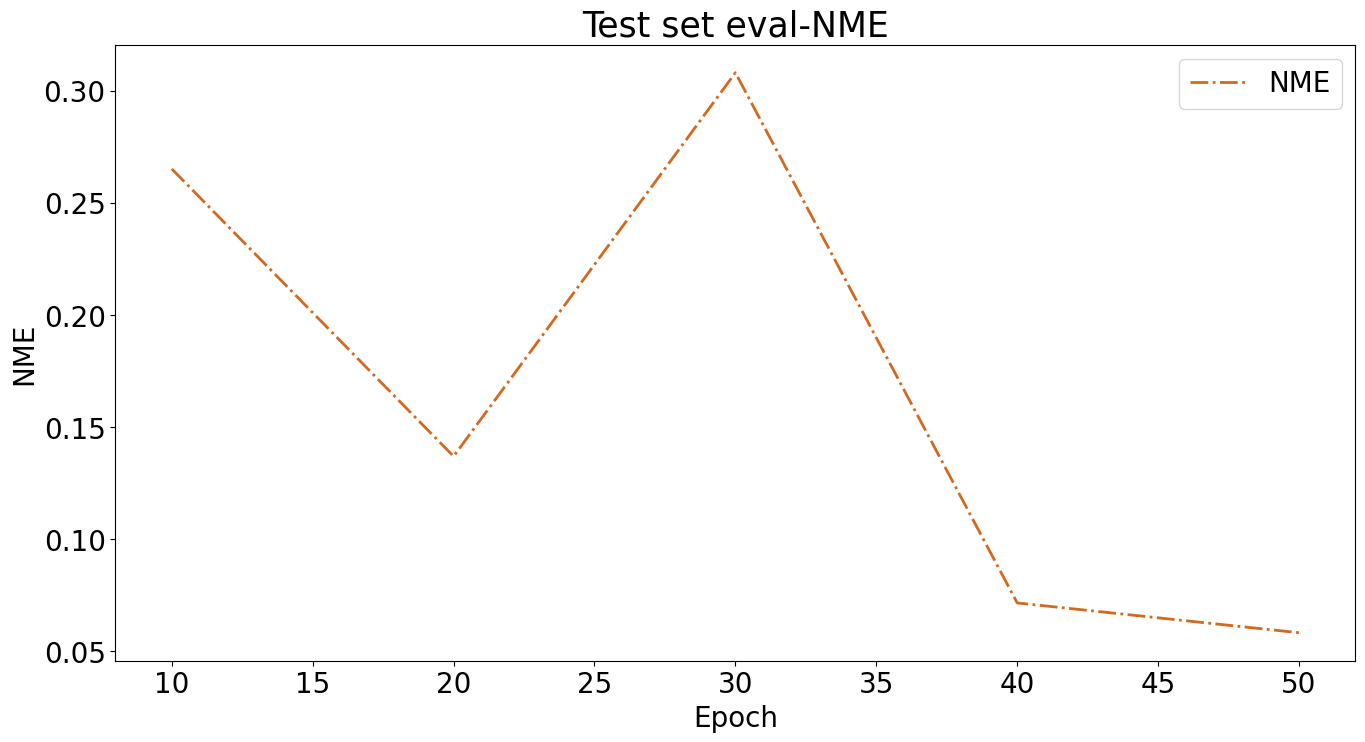

In [61]:
metrics = ['NME']
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('Test set eval-NME', fontsize=25)

plt.legend(fontsize=20)

plt.show()

In [60]:
# save results
!cp -r /content/mmpose/work_dirs/rtmpose-s-ear /content/drive/MyDrive/temp/rtmpose-s-ear